## Car Companies Stock Analysis (Tesla,Ford,GM (2012 -2018))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas_datareader
import datetime

In [4]:
import pandas_datareader.data as web

In [5]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2018,1,1)

In [7]:
tesla = web.DataReader('TSLA','yahoo',start,end)

In [9]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


In [10]:
ford = web.DataReader('F','yahoo',start,end)
gm = web.DataReader('GM','yahoo',start,end)

In [11]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.777642
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.896437
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.099089
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.182942
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.245838


In [12]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.640026
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.719082
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.525387
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,18.118261
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,18.055021


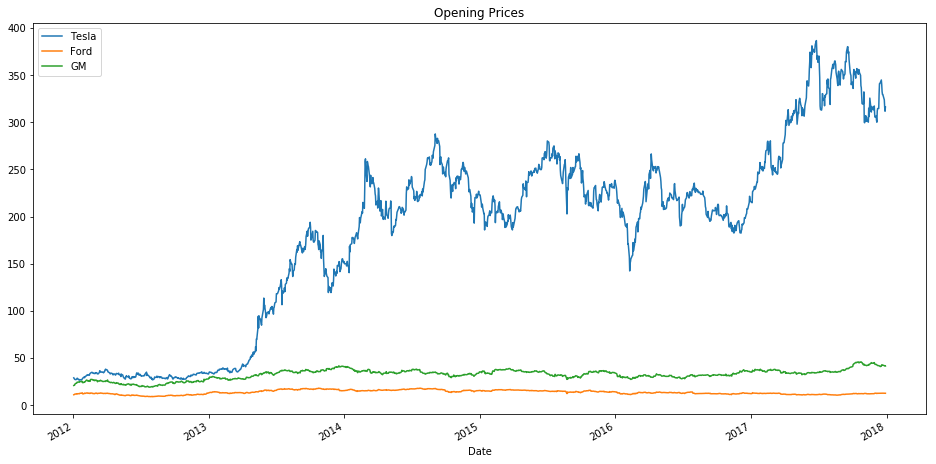

In [14]:
tesla['Open'].plot(label = 'Tesla', figsize=(16,8), title='Opening Prices')
ford['Open'].plot(label = 'Ford')
gm['Open'].plot(label = 'GM')
plt.legend();

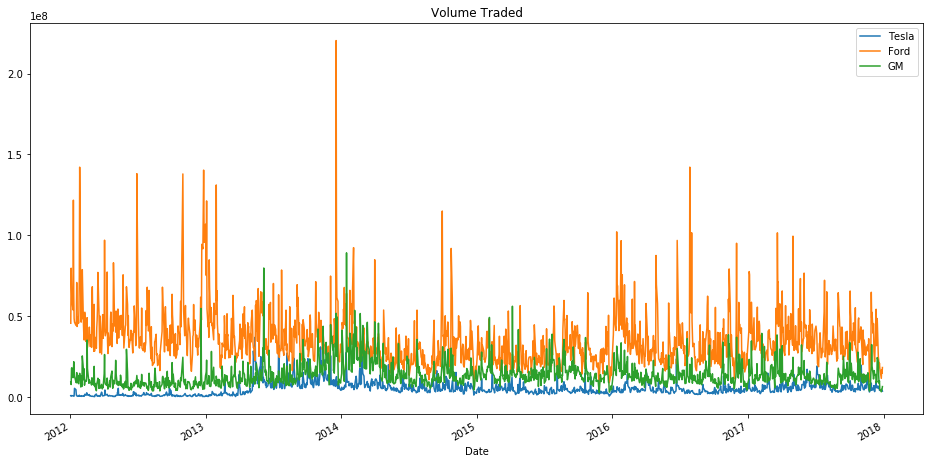

In [15]:
tesla['Volume'].plot(label = 'Tesla', figsize=(16,8), title='Volume Traded')
ford['Volume'].plot(label = 'Ford')
gm['Volume'].plot(label = 'GM')
plt.legend();

In [16]:
ford['Volume'].argmax()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2013-12-18 00:00:00')

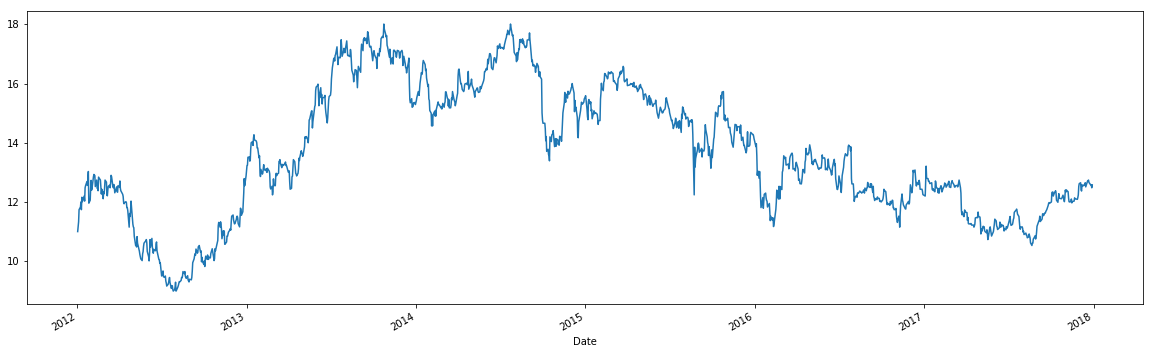

In [18]:
ford['Open'].plot(figsize=(20,6));

In [19]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

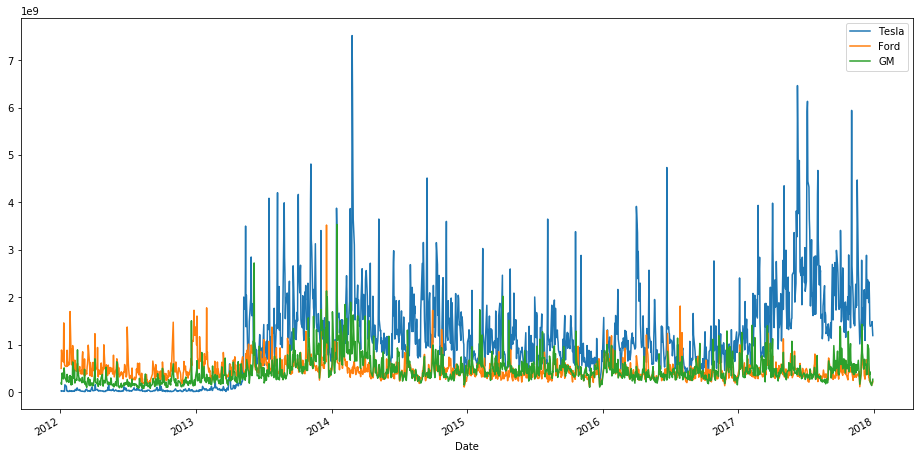

In [20]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
ford['Total Traded'].plot(label='Ford')
gm['Total Traded'].plot(label='GM')
plt.legend();

In [21]:
tesla['Total Traded'].argmax()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2014-02-25 00:00:00')

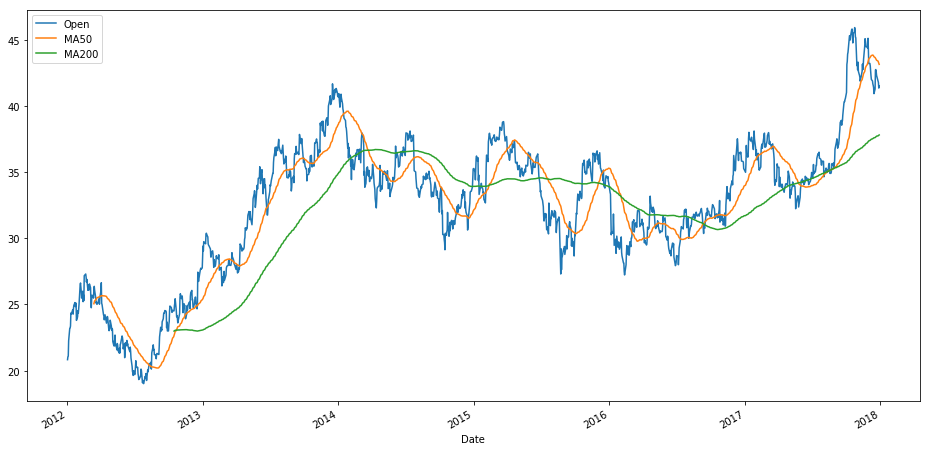

In [24]:
gm['MA50']=gm['Open'].rolling(50).mean()
gm['MA200']=gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(figsize=(16,8))

In [26]:
from pandas.plotting import scatter_matrix

In [27]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis =1)

In [29]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

In [30]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,28.940001,20.830000,11.00
2012-01-04,28.209999,21.049999,11.15
2012-01-05,27.760000,21.100000,11.33
2012-01-06,27.200001,22.260000,11.74
2012-01-09,27.000000,23.200001,11.83


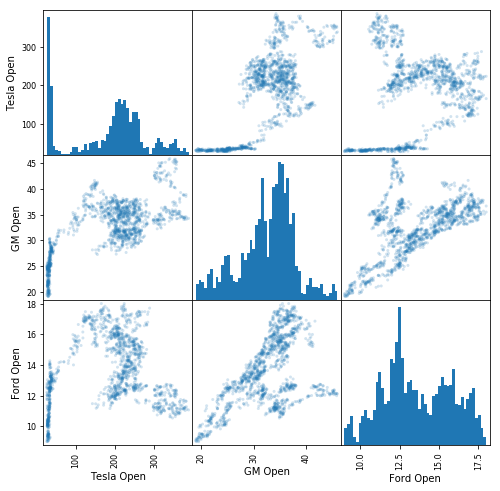

In [31]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [39]:
import mpl_finance
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY

In [40]:
ford_reset = ford.loc['2012-01'].reset_index()

In [41]:
ford_reset

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded
0,2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.777642,5.028089e+08
1,2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.896437,8.889359e+08
2,2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.099089,7.690521e+08
3,2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.182942,7.025298e+08
4,2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.245838,6.386011e+08
5,2012-01-10,12.05,11.63,12.00,11.80,121750600.0,8.245838,1.461007e+09
6,2012-01-11,12.18,11.65,11.74,12.07,63806000.0,8.434512,7.490824e+08
7,2012-01-12,12.18,11.89,12.16,12.14,48687700.0,8.483429,5.920424e+08
8,2012-01-13,12.08,11.84,12.01,12.04,46366700.0,8.413548,5.568641e+08
9,2012-01-17,12.26,11.96,12.20,12.02,44398400.0,8.399572,5.416605e+08


In [42]:
ford_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
Date            20 non-null datetime64[ns]
High            20 non-null float64
Low             20 non-null float64
Open            20 non-null float64
Close           20 non-null float64
Volume          20 non-null float64
Adj Close       20 non-null float64
Total Traded    20 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.3 KB


In [43]:
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))

In [44]:
ford_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,date_ax
0,2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.777642,5.028089e+08,734505.0
1,2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.896437,8.889359e+08,734506.0
2,2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.099089,7.690521e+08,734507.0
3,2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.182942,7.025298e+08,734508.0
4,2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.245838,6.386011e+08,734511.0


In [46]:
col_list=['date_ax','Open','High','Low','Close']
ford_values = [tuple(vals) for vals in ford_reset[col_list].values]

In [47]:
ford_values

[(734505.0, 11.0, 11.25, 10.989999771118164, 11.130000114440918),
 (734506.0,
  11.149999618530273,
  11.529999732971191,
  11.069999694824219,
  11.300000190734863),
 (734507.0,
  11.329999923706055,
  11.630000114440918,
  11.239999771118164,
  11.59000015258789),
 (734508.0,
  11.739999771118164,
  11.800000190734863,
  11.520000457763672,
  11.710000038146973),
 (734511.0,
  11.829999923706055,
  11.949999809265137,
  11.699999809265137,
  11.800000190734863),
 (734512.0, 12.0, 12.050000190734863, 11.630000114440918, 11.800000190734863),
 (734513.0,
  11.739999771118164,
  12.180000305175781,
  11.649999618530273,
  12.069999694824219),
 (734514.0,
  12.15999984741211,
  12.180000305175781,
  11.890000343322754,
  12.140000343322754),
 (734515.0,
  12.010000228881836,
  12.079999923706055,
  11.84000015258789,
  12.039999961853027),
 (734519.0,
  12.199999809265137,
  12.260000228881836,
  11.960000038146973,
  12.020000457763672),
 (734520.0, 12.029999732971191, 12.369999885559082

In [48]:
mondays=WeekdayLocator(MONDAY)
alldays=DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

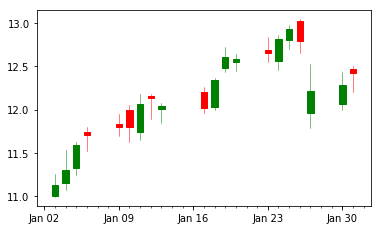

In [50]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom = 0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax,ford_values,width=0.6,colorup='g',colordown='r');

## Daily Percentage

In [53]:
tesla['returns']=tesla['Close'].pct_change(1)
ford['returns']=ford['Close'].pct_change(1)
gm['returns']=gm['Close'].pct_change(1)

In [54]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635


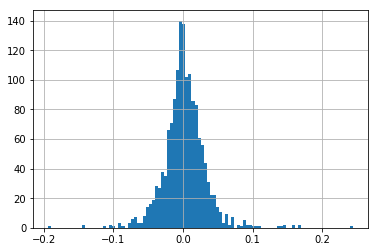

In [55]:
tesla['returns'].hist(bins=100)

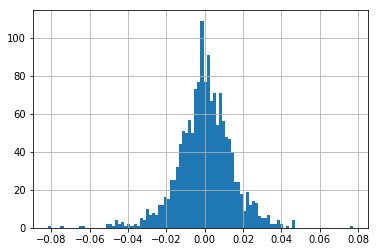

In [56]:
ford['returns'].hist(bins=100)

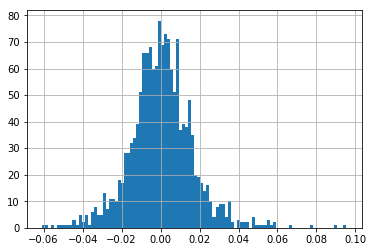

In [57]:
gm['returns'].hist(bins=100)

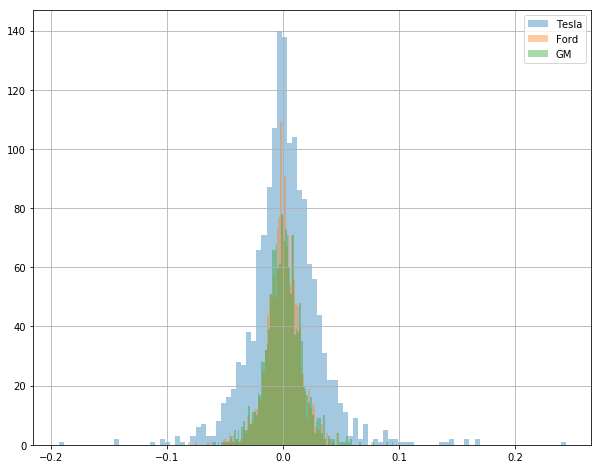

In [59]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.4)
ford['returns'].hist(bins=100,label='Ford',figsize=(10,8),alpha=0.4)
gm['returns'].hist(bins=100,label='GM',figsize=(10,8),alpha=0.4)
plt.legend();

## KDE PLots

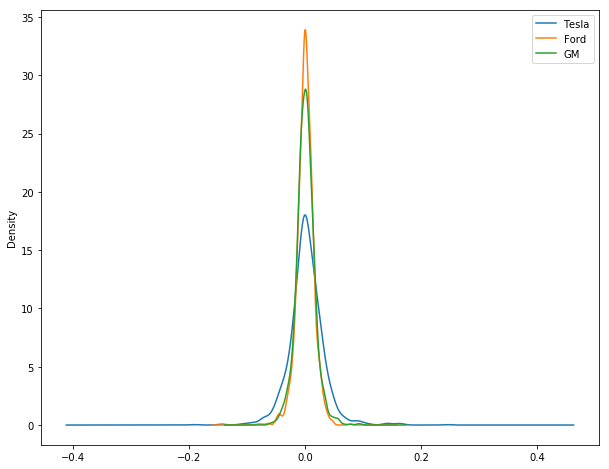

In [60]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(10,8))
ford['returns'].plot(kind='kde',label='Ford',figsize=(10,8))
gm['returns'].plot(kind='kde',label='GM',figsize=(10,8))
plt.legend();

## Boxplot

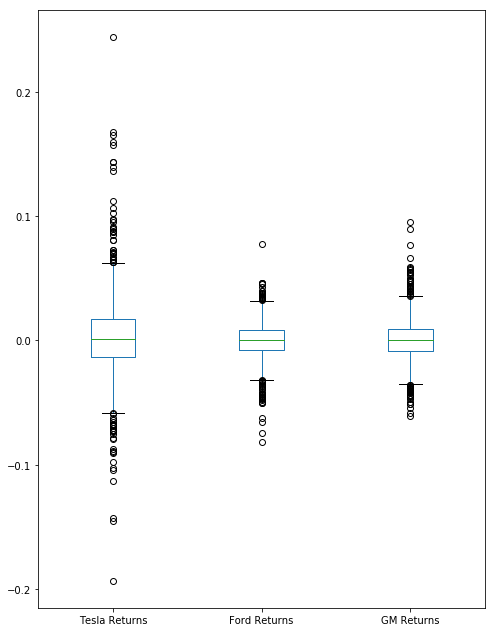

In [61]:
box_df= pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis=1)
box_df.columns = ['Tesla Returns','Ford Returns','GM Returns']
box_df.plot(kind='box',figsize=(8,11))

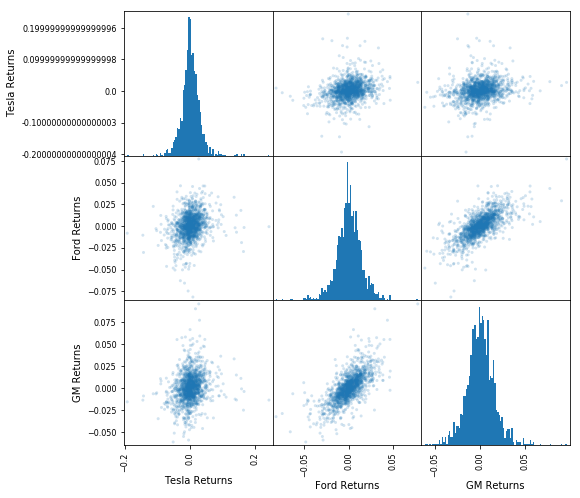

In [63]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100});

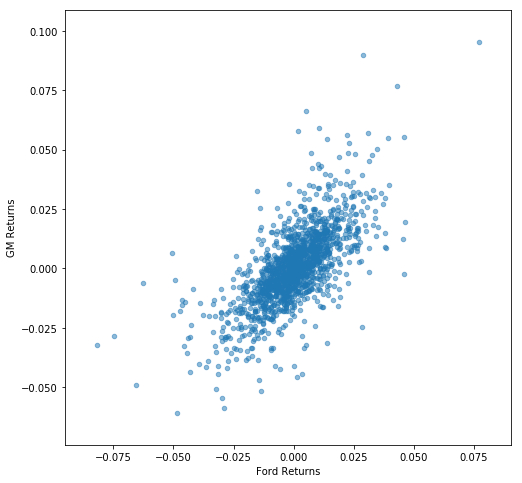

In [64]:
box_df.plot(kind='scatter',x='Ford Returns',y='GM Returns',alpha=0.5,figsize=(8,8))